In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Understanding

*RKL
*John Hopkins
*Rest APIs

## Goals

* We would like to understand the data quality

* Everything should be automated as much as possible:
    how many clicks do we need to execute the full pipeline
    

## Contraints:

* Each notebook should be left clean and ready for full execution

In [2]:
datapath = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw =pd.read_csv(datapath)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22,5/16/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178922,178981,179010,179017,179131,179169,179203,179242,179267,179321
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275341,275366,275372,275416,275440,275485,275534,275574,275615,275621
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265794,265798,265800,265804,265806,265808,265814,265816,265818,265823
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,42156,42156,42156,42156,42156
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7663,7663,7663,7663,7721,7721,7721,7721,7721,7795
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9083673,9101319,9101319,9101319,9101319,9101319,9101319,9101319,9135308,9135308
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422877,422877,422896,422896,422900,422900,422900,422900,422900,422917
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,111599,112407,113368,114564,115688,116905,117882,118728,119548,120638


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/7/22', '5/8/22', '5/9/22', '5/10/22', '5/11/22', '5/12/22',
       '5/13/22', '5/14/22', '5/15/22', '5/16/22'],
      dtype='object', length=846)

In [5]:
time_idx = pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [8]:
len(pd_raw['Country/Region'].unique())

199

In [9]:
pd_raw[pd_raw['Country/Region']=='United Kingdom'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
5/12/22    22354617
5/13/22    22361204
5/14/22    22361204
5/15/22    22361251
5/16/22    22385203
Length: 846, dtype: int64

In [10]:
final_data_list=[]

In [11]:
country_list =('Spain','Germany','Australia','Italy','China'     
                             )

In [12]:
for each in country_list:
    df_plot[each]= np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [13]:
%matplotlib inline
df_plot.head()

,date,Spain,Germany,Australia,Italy,China
0,1/22/20,0,0,0,0,548
1,1/23/20,0,0,0,0,643
2,1/24/20,0,0,0,0,920
3,1/25/20,0,0,0,0,1406
4,1/26/20,0,0,4,0,2075


<AxesSubplot:xlabel='date'>

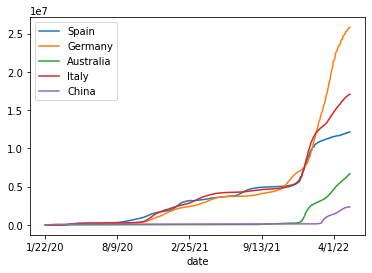

In [14]:
%matplotlib inline
df_plot.set_index('date').plot()

In [15]:
type(df_plot.date[0])

str

In [16]:
df_plot.head()


,date,Spain,Germany,Australia,Italy,China
0,1/22/20,0,0,0,0,548
1,1/23/20,0,0,0,0,643
2,1/24/20,0,0,0,0,920
3,1/25/20,0,0,0,0,1406
4,1/26/20,0,0,4,0,2075


In [17]:
from datetime import datetime

In [18]:
df_plot.date[0]
    


'1/22/20'

In [19]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [20]:
time_index =[datetime.strptime(each, "%m/%d/%y") for each in df_plot.date]
time_index[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [21]:
time_str = [datetime.strftime(each, "%y-%m-%d") for each in time_index]
time_str[0:5]

['20-01-22', '20-01-23', '20-01-24', '20-01-25', '20-01-26']

In [22]:
df_plot['date']=time_index
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df_plot.head()

,date,Spain,Germany,Australia,Italy,China
0,2020-01-22,0,0,0,0,548
1,2020-01-23,0,0,0,0,643
2,2020-01-24,0,0,0,0,920
3,2020-01-25,0,0,0,0,1406
4,2020-01-26,0,0,4,0,2075


In [24]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';')

In [25]:
##Relational data model -defining PK

In [26]:
pd_raw =pd.read_csv(datapath)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22,5/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178922,178981,179010,179017,179131,179169,179203,179242,179267,179321
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275341,275366,275372,275416,275440,275485,275534,275574,275615,275621
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265794,265798,265800,265804,265806,265808,265814,265816,265818,265823
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,42156,42156,42156,42156,42156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [27]:
pd_data_base=pd_raw.rename(columns={'Province/State':'state', 'Country/Region': 'country'})

In [28]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22,5/16/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,178922,178981,179010,179017,179131,179169,179203,179242,179267,179321
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275341,275366,275372,275416,275440,275485,275534,275574,275615,275621
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265794,265798,265800,265804,265806,265808,265814,265816,265818,265823
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,42156,42156,42156,42156,42156
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [29]:
pd_data_base.set_index(['state','country'])

1/22/20  \
state                                        country                                     
NaN                                          Afghanistan                             0   
                                             Albania                                 0   
                                             Algeria                                 0   
                                             Andorra                                 0   
                                             Angola                                  0   
                                             Antarctica                              0   
                                             Antigua and Barbuda                     0   
                                             Argentina                               0   
                                             Armenia                                 0   
Australian Capital Territory                 Australia                               0   
New South Wales                              Australia                               0   
Northern Territory                           Australia                               0   
Queensland                                   Australia                               0   
South Australia                              Australia                               0   
Tasmania                                     Australia                               0   
Victoria                                     Australia                               0   
Western Australia                            Australia                               0   
NaN                                          Austria                                 0   
                                             Azerbaijan                              0   
                                             Bahamas                                 0   
                                             Bahrain                                 0   
                                             Bangladesh                              0   
                                             Barbados                                0   
                                             Belarus                                 0   
                                             Belgium                                 0   
                                             Belize                                  0   
                                             Benin                                   0   
                                             Bhutan                                  0   
                                             Bolivia                                 0   
                                             Bosnia and Herzegovina                  0   
                                             Botswana                                0   
                                             Brazil                                  0   
                                             Brunei                                  0   
                                             Bulgaria                                0   
                                             Burkina Faso                            0   
                                             Burma                                   0   
                                             Burundi                                 0   
                                             Cabo Verde                              0   
                                             Cambodia                                0   
                                             Cameroon                                0   
Alberta                                      Canada                                  0   
British Columbia                             Canada                                  0   
Diamond Princess                             Canada                                  0   
Grand Princess               

In [30]:
test_pd =pd_data_base.set_index(['state','country']).T

In [31]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [32]:
test_pd.stack(level=[0,1]).reset_index().rename(columns={'level_o':'date','0':'confirmed'})

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
241105,5/16/22,Western Australia,Australia,576315.0
241106,5/16/22,Xinjiang,China,1008.0
241107,5/16/22,Yukon,Canada,4328.0
241108,5/16/22,Yunnan,China,2130.0


In [33]:
test_pd.dtypes

state                                         country                         
NaN                                           Afghanistan                         int64
                                              Albania                             int64
                                              Algeria                             int64
                                              Andorra                             int64
                                              Angola                              int64
                                              Antarctica                          int64
                                              Antigua and Barbuda                 int64
                                              Argentina                           int64
                                              Armenia                             int64
Australian Capital Territory                  Australia                           int64
New South Wales                          

In [34]:
test_pd.to_csv('../data/processed/COVID_relational_data.csv', sep=';')